# Stanford CME 241 (Winter 2024) - Assignment 6

**Due: Feb 19 @ 11:59pm Pacific Time on Gradescope.**

Assignment instructions:
- **Solve all 3 questions.**
- Empty code blocks are for your use. Feel free to create more under each section as needed.

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/neelsnarayan/cme241/blob/master/neel_mehdi_assignments/assignment6/Neel_Mehdi_Assignment6.ipynb

*Group members (replace below names with people in your group):* 
- Neel Narayan
- Mehdi Zhioua

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1
We consider a special case of the Optimal Market-Making problem we
covered in class (Avellandea-Stoikov formulation) where the market-maker
has a cash amount of $W \in \mathbb{R}$ at time 0 and an inventory of
shares equal to $I \in \mathbb{Z}$ (note: this could be positive or
negative), but is not going to be market-making until time $T$. The
market maker's *Value Function* at time $t$ (with $0 \leq t \leq T$) is
given by the Expected Utility at time $T$ (conditional on the time $t$
and the OB Mid Price $S_t$ at time $t$):

$$V(t, S_t, W, I) = \mathbb{E}[-e^{-\gamma \cdot (W + I \cdot S_T)} | (t, S_t)]$$

Assume the same process for the OB Mid Price as we had covered in class:

$$dS_t = \sigma \cdot dz_t$$

for some fixed $\sigma \in \mathbb{R}^+$. This means:

$$S_{t_2} \sim \mathcal{N}(S_{t_1}, \sigma^2 \cdot (t_2 - t_1))$$

for all $0 \leq t_1 \leq t_2$.

-   Under this process for $S_t$, evaluate the conditional expectation
    $\mathbb{E}[-e^{-\gamma \cdot (W + I \cdot S_T)} | (t, S_t)]$ so you
    have a simple expression for $V(t, S_t, W, I)$.

-   Using the above expression for $V(t, S_t, W, I)$, calculate the
    Indifference Bid Price $Q^{(b)}(t, S_t, I)$ and the Indifference Ask
    Price $Q^{(a)}(t,S_t,I)$, which have the same definitions as we had
    covered in class, as follows:

    $$V(t,S_t,W - Q^{(b)}(t, S_t, I), I + 1) = V(t,S_t,W, I)$$
    $$V(t,S_t,W + Q^{(a)}(t, S_t, I), I - 1) = V(t,S_t,W, I)$$

a) 
If we name $Z$ a $\mathcal{N}(0,1)$ variable then we see that we need to compute:
\begin{align*}
V(t,S_t,W,I) &= -e^{-\gamma W}\mathbb{E}(e^{-\gamma [I(S_t + \sigma \sqrt{T-t}Z)]}|(t,S_t))\\
&= -e^{-\gamma(W+IS_t)} M(-\gamma I \sigma \sqrt{T-t})
\end{align*}
Where $M$ is the moment generating function of $Z$. So we get
$$
V(t,S_t,W,I) = -e^{-\gamma(W+IS_t)} e^{\sigma^2\gamma^2 I^2 (T-t)/2} = -\exp\left\{-\gamma(W+IS_t) + \sigma^2\gamma^2 I^2 (T-t)/2\right\}
$$

b) Now for the indiferrence price, we solve, for $\epsilon \in \{-1,1\}$:
$$
-\gamma(W+IS_t) + \sigma^2\gamma^2 I^2 (T-t)/2 = -\gamma(W-\epsilon q_{\epsilon}+(I+\epsilon)S_t) + \sigma^2\gamma^2 (I+\epsilon)^2 (T-t)/2
$$

$$
-\gamma \epsilon q_{\epsilon} = \frac{\sigma^2 \gamma^2(T-t)}{2}\epsilon(2I+\epsilon) - \gamma  \epsilon S_t
$$

And therefore :
$$
q_{\epsilon} =  S_t - \frac{\sigma^2 \gamma(T-t)}{2}(2I+\epsilon) 
$$

Which gets us:
$$
Q^{(a)}(t,S_T,I) = S_t - \frac{\sigma^2 \gamma(T-t)}{2}(2I-1) 
$$
$$
Q^{(b)}(t,S_T,I) = S_t - \frac{\sigma^2 \gamma(T-t)}{2}(2I+1) 
$$

## Question 2
We'd like to test the performance of the Optimal Policy we derived in
class for the Optimal Market-Making problem. In particular, we want to
compare this Optimal Policy against a policy (call it "Naive Policy")
that is always symmetric around the OB Mid Price (rather than around the
Indifference Price) with a constant Bid-Ask Spread equal to the average
Bid-Ask Spread of the Optimal Policy.

We will do the comparison by generating a large number of simulation
traces. Each simulation trace consists of $\frac T {\Delta t}$ time
steps. The time step $\Delta t$ needs to be small enough so that the
probability of multiple orders transacting with the market-maker is
small but needs to be large enough so that there are indeed orders that
transact with the market-maker. In their paper, Avallaneda-Stoikov point
out that $\Delta t = 0.005$ worked well in their simulation experiments.

Here are the details on how to perform a time step in each simulation
trace for the Optimal Policy:

-   At each time $t$, we observe the *State*, and calculate the Optimal
    Action $(P_t^{(b)^*}, P_t^{(a)^*})$.

-   With probability
    $c \cdot e^{-k \cdot \delta_t^{(a)^*}} \cdot \Delta t$, the
    inventory variable is decremented by 1 and the trading PnL is
    increased by $P_t^{(a)^*}$.

-   With probability
    $c \cdot e^{-k \cdot \delta_t^{(b)^*}} \cdot \Delta t$, the
    inventory variable is incremented by 1 and the trading PnL is
    decreased by $P_t^{(b)^*}$.

-   The OB Mid Price is incremented or decremented randomly (each with
    probability 0.5) by $\sigma \cdot \sqrt{\Delta t}$.

-   These updates to the inventory variable, to the trading PnL and to
    the OB Mid Price give us the *State* for the next time
    $t + \Delta t$.

We run a large number (say 10,000) such simulation traces. We calculate
the average Bid-Ask Spread across all time steps across all simulation
traces. Then we set the Bid-Ask Spread for the "naive policy" to be this
average Bid-Ask Spread (constant Bid-Ask Spread). Repeat the same large
number of simulations for the "naive policy".

Track the relevant metrics for each simulation trace on both the
policies - the trading PnL, the Inventory, the OB Mid Price, the Bid
Price, the Ask Price, the number of hits and lifts etc. Plot graphs for
these metrics. You can view the metrics on a single simulation trace or
you can view the average metrics at a fixed time (in particular for
terminal time $T$). Demonstrate empirically that the Optimal Policy does
indeed perform better than the "naive policy".

Avallaneda-Stoikov used the following parameters in their simulation:

$S_0 = 100, T = 1, \Delta t = 0.005, \gamma = 0.1, \sigma = 2, I_0 = 0, k = 1.5, c = 140$.

In [2]:
class OrderBook:
    def __init__(self, S0, T, delta_t, gamma, sigma, I0, k, c, policy='optimal'):
        self.S0 = S0
        self.T = T
        self.delta_t = delta_t
        self.gamma = gamma
        self.sigma = sigma
        self.I0 = I0
        self.k = k
        self.c = c
        self.policy = policy
        self.n_steps = int(T / delta_t)
        self.S = np.zeros(self.n_steps + 1)
        self.S[0] = S0
        self.inventory = np.zeros(self.n_steps + 1)
        self.inventory[0] = I0
        self.PnL = np.zeros(self.n_steps + 1)
        self.bid_prices = np.zeros(self.n_steps)
        self.ask_prices = np.zeros(self.n_steps)
        self.hits = np.zeros(self.n_steps)
        self.lifts = np.zeros(self.n_steps)

    def optimal_ba_spred(self,S,q,t):
        return self.gamma*self.sigma**2*(self.T-t) + (2/self.gamma)*np.log(1+self.gamma/self.k)
    
    def r_price(self,S,q,t):
        return S-q*self.gamma*self.sigma**2*(self.T-t)

    def optimal_bid(self, S, q,t):
        return self.r_price(S,q,t) - self.optimal_ba_spred(S,q,t)/2

    def optimal_ask(self, S, q,t):
        return self.r_price(S,q,t) + self.optimal_ba_spred(S,q,t)/2

    def simulate(self):
        for t in range(self.n_steps):
            if self.policy == 'optimal':
                t_ = t/self.n_steps
                Pb = self.optimal_bid(self.S[t], self.inventory[t],t_)
                Pa = self.optimal_ask(self.S[t], self.inventory[t],t_)
            else:  # Naive policy
                spread = 2.0  
                Pb = self.S[t] - spread / 2
                Pa = self.S[t] + spread / 2

            self.bid_prices[t] = Pb
            self.ask_prices[t] = Pa

            if np.random.rand() < self.c * np.exp(-self.k * (Pa - self.S[t])) * self.delta_t:
                self.inventory[t + 1] = self.inventory[t] - 1
                self.PnL[t + 1] = self.PnL[t] + Pa
                self.lifts[t] = 1
            elif np.random.rand() < self.c * np.exp(-self.k * (self.S[t] - Pb)) * self.delta_t:
                self.inventory[t + 1] = self.inventory[t] + 1
                self.PnL[t + 1] = self.PnL[t] - Pb
                self.hits[t] = 1
            else:
                self.inventory[t + 1] = self.inventory[t]
                self.PnL[t + 1] = self.PnL[t]

            self.S[t + 1] = self.S[t] + self.sigma * np.sqrt(self.delta_t) * np.random.choice([-1, 1])

    def visualize_metrics(self):
        plt.figure(figsize=(12, 10))

        # Cumulative PnL plot
        plt.subplot(2, 2, 1)
        plt.plot(np.cumsum(self.PnL), label='Cumulative PnL')
        plt.title('Cumulative PnL Over Time')
        plt.xlabel('Time Step')
        plt.ylabel('Cumulative PnL')

        # Cumulative number of hits and lifts
        plt.subplot(2, 2, 3)
        plt.plot(np.cumsum(self.hits), label='Cumulative Hits')
        plt.plot(np.cumsum(self.lifts), label='Cumulative Lifts')
        plt.title('Cumulative Hits and Lifts Over Time')
        plt.xlabel('Time Step')
        plt.ylabel('Count')

        # Price process
        plt.subplot(2, 2, 2)
        plt.plot(self.S, label='OB Mid Price')
        plt.title('Price Process Over Time')
        plt.xlabel('Time Step')
        plt.ylabel('Price')

        # Spread visualization
        plt.subplot(2, 2, 4)
        plt.plot(self.ask_prices - self.S[:-1], label='Ask - Price', color='green')
        plt.plot(self.bid_prices - self.S[:-1], label='Bid - Price', color='red')
        plt.axhline(0, color='black', linewidth=0.5)
        plt.title('Spread Visualization')
        plt.xlabel('Time Step')
        plt.ylabel('Spread')
        plt.legend()

        plt.tight_layout()
        plt.show()

### Avellaneda Stoikov Optimal (on 1 run)

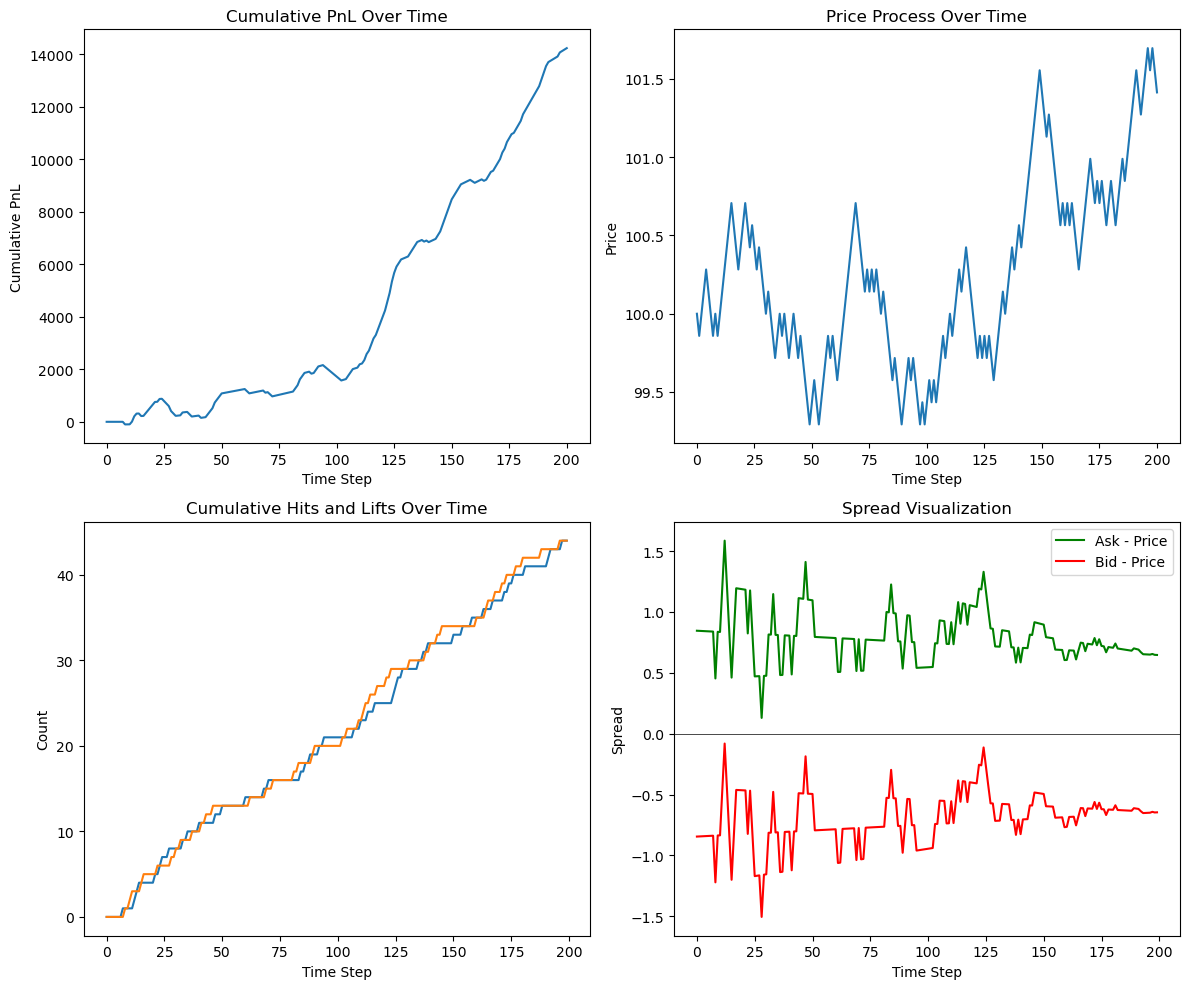

In [3]:
order_book_optimal = OrderBook(S0=100, T=1, delta_t=0.005, gamma=0.1, sigma=2, I0=0, k=1.5, c=140, policy='optimal')
order_book_optimal.simulate()
order_book_optimal.visualize_metrics()

### Naive Policy (on 1 run)

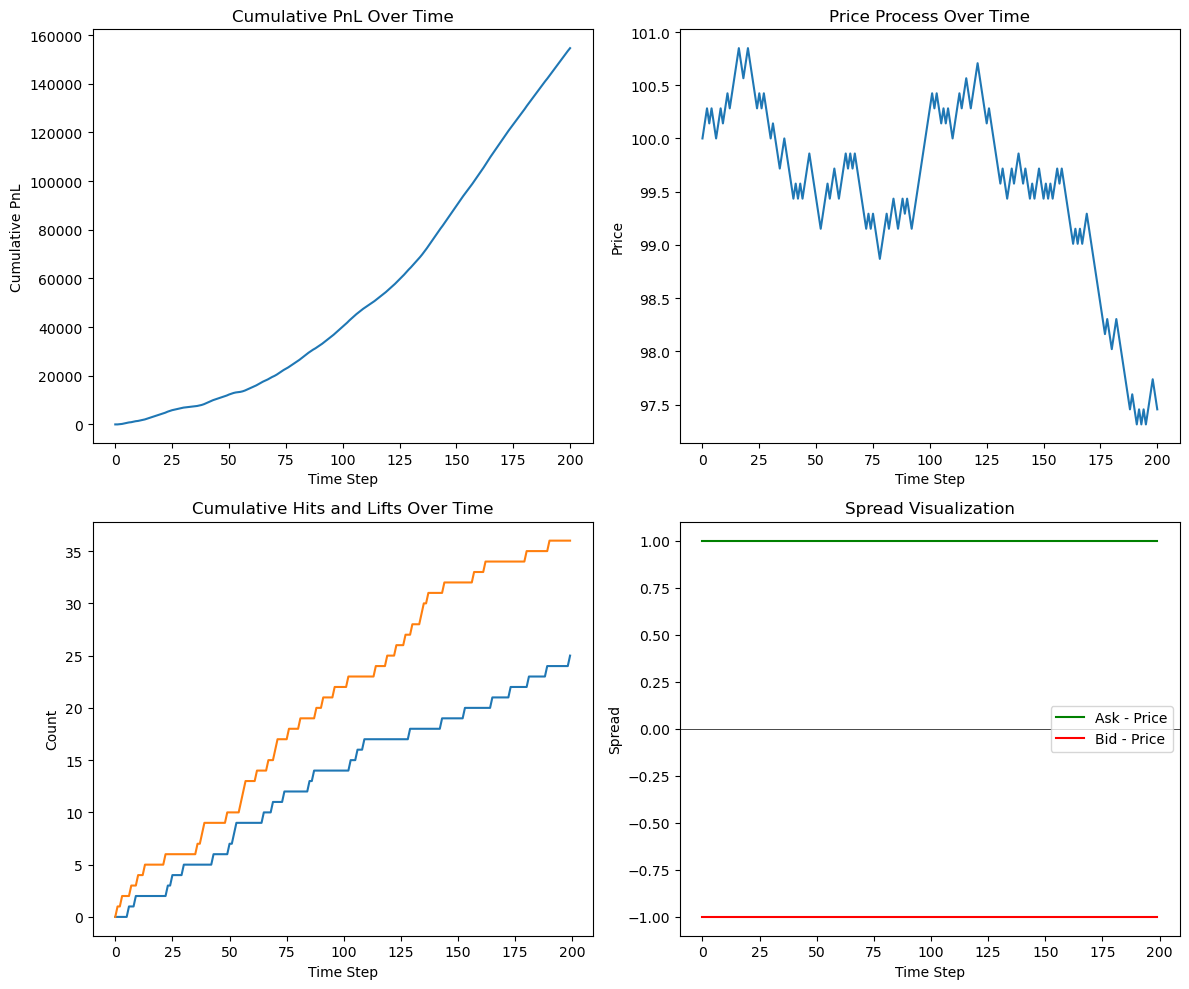

In [4]:
order_book_naive = OrderBook(S0=100, T=1, delta_t=0.005, gamma=0.1, sigma=2, I0=0, k=1.5, c=140, policy='naive')
order_book_naive.simulate()
order_book_naive.visualize_metrics()

### 10000 runs of each

Mean PnL : 267.48923995818836
Std : 319.1610162475852


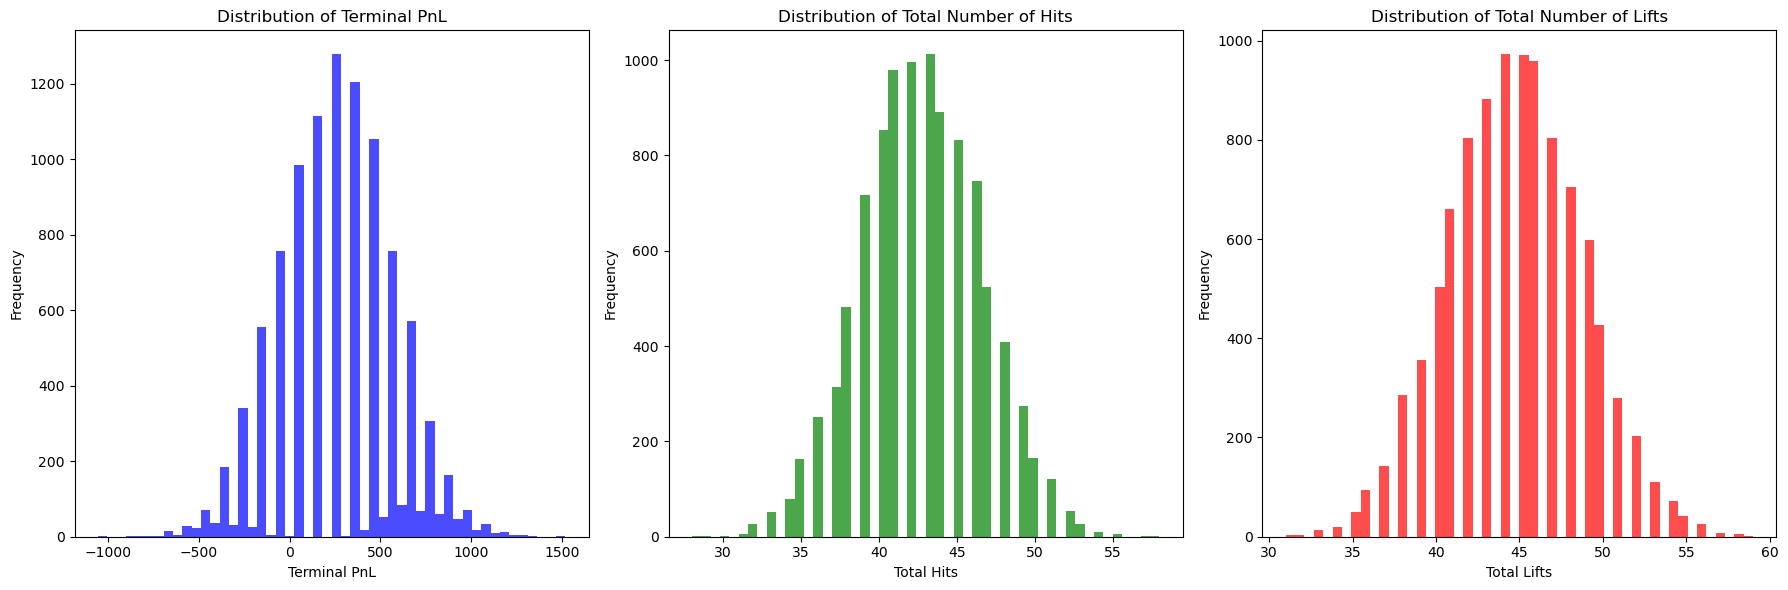

Mean PnL : 554.5729314321244
Std : 748.3864775104772


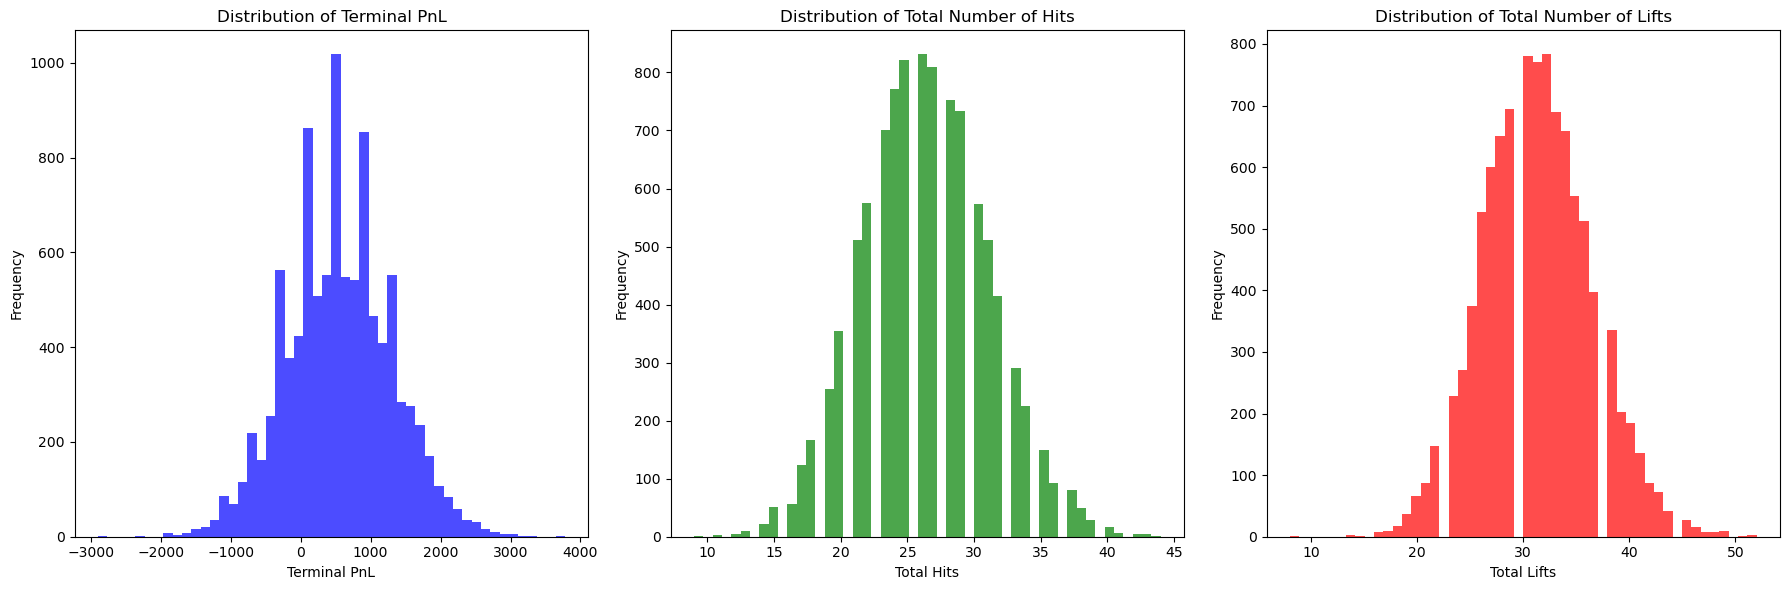

In [5]:
class OrderBookMC:
    def __init__(self, simulations, S0, T, delta_t, gamma, sigma, I0, k, c, policy='optimal'):
        self.simulations = simulations
        self.S0 = S0
        self.T = T
        self.delta_t = delta_t
        self.gamma = gamma
        self.sigma = sigma
        self.I0 = I0
        self.k = k
        self.c = c
        self.policy = policy
        self.PnLs = np.zeros(simulations)
        self.total_hits = np.zeros(simulations)
        self.total_lifts = np.zeros(simulations)
    
    def simulate(self):
        for i in range(self.simulations):
            ob = OrderBook(self.S0, self.T, self.delta_t, self.gamma, self.sigma, self.I0, self.k, self.c, self.policy)
            ob.simulate()
            self.PnLs[i] = ob.PnL[-1]
            self.total_hits[i] = np.sum(ob.hits)
            self.total_lifts[i] = np.sum(ob.lifts)
    
    def visualize_metrics(self):
        plt.figure(figsize=(18, 6))
        
        print("Mean PnL :",np.mean(self.PnLs))
        print("Std :",np.std(self.PnLs))
        # Distribution of terminal PnL
        plt.subplot(1, 3, 1)
        plt.hist(self.PnLs, bins=50, color='blue', alpha=0.7)
        plt.title('Distribution of Terminal PnL')
        plt.xlabel('Terminal PnL')
        plt.ylabel('Frequency')
        
        # Distribution of total number of hits
        plt.subplot(1, 3, 2)
        plt.hist(self.total_hits, bins=50, color='green', alpha=0.7)
        plt.title('Distribution of Total Number of Hits')
        plt.xlabel('Total Hits')
        plt.ylabel('Frequency')
        
        # Distribution of total number of lifts
        plt.subplot(1, 3, 3)
        plt.hist(self.total_lifts, bins=50, color='red', alpha=0.7)
        plt.title('Distribution of Total Number of Lifts')
        plt.xlabel('Total Lifts')
        plt.ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()


order_book_mc = OrderBookMC(simulations=10000, S0=100, T=1, delta_t=0.005, gamma=0.1, sigma=2, I0=0, k=1.5, c=140, policy='optimal')
order_book_mc.simulate()
order_book_mc.visualize_metrics()


order_book_mc = OrderBookMC(simulations=10000, S0=100, T=1, delta_t=0.005, gamma=0.1, sigma=2, I0=0, k=1.5, c=140, policy='naive')
order_book_mc.simulate()
order_book_mc.visualize_metrics()

We see that the optimal strategy is better in the sense that the mean of the PnL is positive, less than the naive strategy, but with much lower standard deviation. We see that on some scenarios, the naive strategy suffered losses above 2000 whereas the optimal strategy very rarely loses more than 500. In other terms, the optimal strategy has a better risk adjusted return $Mean(PnL)/Std(PnL) = 0.84$ vs $0.72$ for the naive strategy. We also see that the total numebr of hits/lifts is in average higher for the optimal strategy

## Question 3
Although the provided code contains a number of utilties for Monte-Carlo
prediction, you may consider writing re-writing these functions to
improve your understanding.

1.  We have written the function `mc_prediction` in
    [rl/monte_carlo.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/monte_carlo.py)
    as an implementation of Monte-Carlo Prediction with function
    approximation. You have also learnt that since Tabular MC Prediction
    is a special case of MC Prediction with Function Approximation and
    so, writing a separate function for Tabular MC Prediction is not
    necessary. But for a learning experience, it's a great idea to write
    a function for Tabular MC Prediction **from scratch**. Think about
    what the input and output types must be. Be sure to reduce the
    learning rate appropriately as a function of number of updates (or
    as a function of number of episodes).

2.  We have written the function `td_prediction` in
    [rl/td.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/td.py)
    as an implementation of Temporal-Difference Prediction with function
    approximation. You have also learnt that since Tabular TD Prediction
    is a special case of TD Prediction with Function Approximation and
    so, writing a separate function for Tabular TD Prediction is not
    necessary. But for a learning experience, it's a great idea to write
    a function for Tabular TD Prediction **from scratch**. Think about
    what the input and output types must be. Be sure to reduce the
    learning rate appropriately as a function of number of updates.

3.  Test your above implementations of Tabular MC Prediction and Tabular
    TD Prediction on\
    `SimpleInventoryMRPFinite` (from
    [rl/chapter2/simple_inventory_mrp.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter2/simple_inventory_mrp.py))
    by ensuring that your Value Function output matches that produced by
    the function approximation versions of MC Prediction and TD
    Prediction.

In [12]:
import numpy as np
import sys
import rl.markov_process as mp
from typing import Iterable, Dict, TypeVar, Iterator
from rl.markov_process import TransitionStep, NonTerminal, Terminal
from rl.markov_process import FiniteMarkovProcess
from rl.chapter2.simple_inventory_mrp import SimpleInventoryMRPFinite
from rl.distribution import Choose, Categorical
from rl.approximate_dynamic_programming import ValueFunctionApprox
from rl.chapter2.simple_inventory_mrp import SimpleInventoryMRPFinite
S = TypeVar('S')

In [76]:
def tabularMCPrediction(
    traces: Iterable[Iterable[mp.TransitionStep[S]]],
    γ: float,
) -> Iterator[Dict[S, float]]:
    
    valueFunction, passThroughCount = {}, {}

    for trace in traces:
        for state, reward in trace:
            if state not in valueFunction:
                valueFunction[state], passThroughCount[state] = 0, 0
            passThroughCount[state] += 1
            # ensure that learning rate decays based on how much it has visited a given state (from slides)
            learning_rate = 1 / passThroughCount[state]
            valueFunction[state] += learning_rate * (reward - valueFunction[state])
    
        yield valueFunction

In [77]:
def generateEpisodeMC(mrp, start, user_gamma):
    episode = []
    state = start.sample()
    total_reward = 0
    discounts = 1
    for _ in range(100):
        next_state, reward = mrp.transition_reward(state).sample()
        total_reward += discounts * reward
        discounts *= user_gamma
        episode.append((state.state, total_reward))
        if isinstance(next_state, Terminal):
            break
        state = next_state
    return episode

In [78]:
def tabularTDPrediction(
    traces: Iterable[mp.TransitionStep[S]],
    γ: float,
) -> Iterator[ValueFunctionApprox[S]]:

    valueFunction, passThroughCount = {}, {}

    for trace in traces:
        state, reward, next_state = trace.state, trace.reward, trace.next_state
        if state not in valueFunction:
            valueFunction[state], passThroughCount[state] = 0, 0
        passThroughCount[state] += 1
        learning_rate = 1 / passThroughCount[state]
        vsprime = valueFunction[next_state] if next_state in valueFunction else 0.0
        # V(s) = V(s) + α * (R_{t+1} + γ * V(s') - V(s)) <- From slide 14 (Tour-RLPrediction.pdf)
        valueFunction[state] += learning_rate * (reward + γ * vsprime - valueFunction[state])

        yield valueFunction

In [79]:
def generateEpisodeTD(mrp, start, γ):
    episode = []
    state = start.sample()
    for _ in range(100):
        next_state, reward = mrp.transition_reward(state).sample()
        if isinstance(state, NonTerminal):
            episode.append(TransitionStep(state=state, reward=reward, next_state=next_state))
        else:
            break
        state = next_state
    return episode

In [80]:
user_capacity = 2
user_poisson_lambda = 1.0
user_holding_cost = 1.0
user_stockout_cost = 10.0
user_gamma = 0.9

si_mrp = SimpleInventoryMRPFinite(
    capacity=user_capacity,
    poisson_lambda=user_poisson_lambda,
    holding_cost=user_holding_cost,
    stockout_cost=user_stockout_cost
)

In [81]:
# Tabular MC Prediction
traces = [generateEpisodeMC(si_mrp, Choose(si_mrp.non_terminal_states), user_gamma) for _ in range(1000)]
valueFunction = tabularMCPrediction(traces, user_gamma)
print("Tabular MC Prediction")
finalVF = None
for vf in valueFunction:
    finalVF = vf
for state, value in finalVF.items():
    print(f"State (On Hand: {state.on_hand}, On Order: {state.on_order}), Value: {value}")
print("")

# Tabluar TD Prediction
traces = [episode for _ in range(1000) for episode in generateEpisodeTD(si_mrp, Choose(si_mrp.non_terminal_states), user_gamma)]
valueFunction = tabularTDPrediction(traces, user_gamma)
print("Tabular TD Prediction:")
finalVF = None
for vf in valueFunction:
    finalVF = vf
for state, value in finalVF.items():
    print(f"State (On Hand: {state.state.on_hand}, On Order: {state.state.on_order}), Value: {value}")
print("")

# Actual Values
print("Actual Values")
si_mrp.display_value_function(gamma=user_gamma)
print()

Tabular MC Prediction
State (On Hand: 2, On Order: 0), Value: -35.32758295437196
State (On Hand: 0, On Order: 0), Value: -36.21317514792937
State (On Hand: 0, On Order: 2), Value: -35.80038890534394
State (On Hand: 1, On Order: 0), Value: -35.36692065136368
State (On Hand: 0, On Order: 1), Value: -36.101532192134286
State (On Hand: 1, On Order: 1), Value: -35.304841012286836

Tabular TD Prediction:
State (On Hand: 0, On Order: 2), Value: -23.01541398124
State (On Hand: 2, On Order: 0), Value: -25.019896957190728
State (On Hand: 1, On Order: 0), Value: -24.65381645512456
State (On Hand: 1, On Order: 1), Value: -23.979858254431168
State (On Hand: 0, On Order: 0), Value: -29.283152548925848
State (On Hand: 0, On Order: 1), Value: -23.676589795091544

Actual Values
{NonTerminal(state=InventoryState(on_hand=0, on_order=0)): -43.596,
 NonTerminal(state=InventoryState(on_hand=0, on_order=2)): -37.329,
 NonTerminal(state=InventoryState(on_hand=0, on_order=1)): -37.971,
 NonTerminal(state=Inven

In [82]:
print("Transition Map")
print("--------------")
print(FiniteMarkovProcess(
    {s.state: Categorical({s1.state: p for s1, p in v.table().items()})
     for s, v in si_mrp.transition_map.items()}
))

print("Transition Reward Map")
print("---------------------")
print(si_mrp)

print("Stationary Distribution")
print("-----------------------")
si_mrp.display_stationary_distribution()
print()

print("Reward Function")
print("---------------")
si_mrp.display_reward_function()
print()

print("Value Function")
print("--------------")
si_mrp.display_value_function(gamma=user_gamma)
print()

Transition Map
--------------
From State InventoryState(on_hand=0, on_order=0):
  To State InventoryState(on_hand=0, on_order=2) with Probability 1.000
From State InventoryState(on_hand=0, on_order=1):
  To State InventoryState(on_hand=1, on_order=1) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=1) with Probability 0.632
From State InventoryState(on_hand=0, on_order=2):
  To State InventoryState(on_hand=2, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=1, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=0) with Probability 0.264
From State InventoryState(on_hand=1, on_order=0):
  To State InventoryState(on_hand=1, on_order=1) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=1) with Probability 0.632
From State InventoryState(on_hand=1, on_order=1):
  To State InventoryState(on_hand=2, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=1, on_order=0) with Probability 0.368
